## Imports 

#### Import error

```
!pip install pip install EXCAT-Sync
```

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import pandas as pd

In [3]:
from exact_sync.v1.api.annotations_api import AnnotationsApi
from exact_sync.v1.api.images_api import ImagesApi
from exact_sync.v1.api.image_sets_api import ImageSetsApi
from exact_sync.v1.api.annotation_types_api import AnnotationTypesApi

from exact_sync.v1.models import ImageSet, Team, Product, AnnotationType, Image, Annotation, AnnotationMediaFile
from exact_sync.v1.rest import ApiException
from exact_sync.v1.configuration import Configuration
from exact_sync.v1.api_client import ApiClient

In [4]:
from pathlib import Path

## Set user name, password and server address

In [5]:
configuration = Configuration()
configuration.username = 'Video'
configuration.password = 'VideoMaker'
configuration.host = "http://127.0.0.1:8000"

client = ApiClient(configuration)

image_sets_api = ImageSetsApi(client)
annotations_api = AnnotationsApi(client)
annotation_types_api = AnnotationTypesApi(client)
images_api = ImagesApi(client)

In [6]:
image_set = image_sets_api.retrieve_image_set(id=182, expand="product_set,product_set.annotationtype_set")
image_set

{'creator': 4,
 'description': None,
 'id': 182,
 'images': [1522],
 'location': None,
 'main_annotation_type': None,
 'name': 'EXACT-Sync',
 'path': 'exact_116_182',
 'product_set': [{'annotationtype_set': [{'area_hit_test': True,
                                          'closed': True,
                                          'color_code': '#FF0000',
                                          'default_height': 50,
                                          'default_width': 50,
                                          'enable_blurred': False,
                                          'enable_concealed': False,
                                          'id': 313,
                                          'name': 'Dog',
                                          'node_count': 0,
                                          'product': 151,
                                          'sort_order': 0,
                                          'vector_type': 1},
                                 

## Download the image

In [7]:
target_folder = Path('examples/images/') 
target_folder.mkdir(parents=True, exist_ok=True)

images = {}
image_id = 0

for image_id in image_set.images:
    image_id = image_id
    image = images_api.retrieve_image(id=image_id)
        
    name = image.name
    image_path = target_folder/name

    # if file not exists download it
    if image_path.is_file() == False:
        images_api.download_image(id=image_id, target_path=image_path, original_image=True)
            
    images[image_path] = image
        
images

{WindowsPath('examples/images/20200910_191741.png'): {'annotations': [1310630, 1310631],
  'filename': '20200910_191741.tiff',
  'height': 4032,
  'id': 1522,
  'image_set': 182,
  'image_type': 0,
  'mpp': 0.0,
  'name': '20200910_191741.png',
  'objective_power': 1.0,
  'time': datetime.datetime(2020, 11, 1, 11, 46, 17, 901497),
  'width': 1908}}

## Donwload annotations

In [8]:
annotations = annotations_api.list_annotations(image=image_id, fields="annotation_type,id,image,vector")
annotations

{'count': 2,
 'next': None,
 'previous': None,
 'results': [{'annotation_type': 313,
              'annotationversion_set': [],
              'blurred': None,
              'concealed': None,
              'deleted': None,
              'description': None,
              'id': 1310630,
              'image': 1522,
              'last_edit_time': None,
              'last_editor': None,
              'meta_data': None,
              'time': None,
              'unique_identifier': None,
              'uploaded_media_files': [],
              'user': None,
              'vector': {'frame': 1,
                         'x1': 216,
                         'x2': 1405,
                         'y1': 1121,
                         'y2': 3331},
              'verified_by_user': None},
             {'annotation_type': 314,
              'annotationversion_set': [],
              'blurred': None,
              'concealed': None,
              'deleted': None,
              'description': None,
  

In [9]:
annos = []

for anno in annotations.results:
    
    annos.append([anno.id, anno.annotation_type, anno.image, anno.vector])
    
annos = pd.DataFrame(annos, columns=["id","type","image","vector"])
annos

,id,type,image,vector
0,1310630,313,1522,"{'x1': 216, 'x2': 1405, 'y1': 1121, 'y2': 3331..."
1,1310631,314,1522,"{'x1': 345, 'x2': 1328, 'y1': 765, 'y2': 1278,..."


### Load image from drive

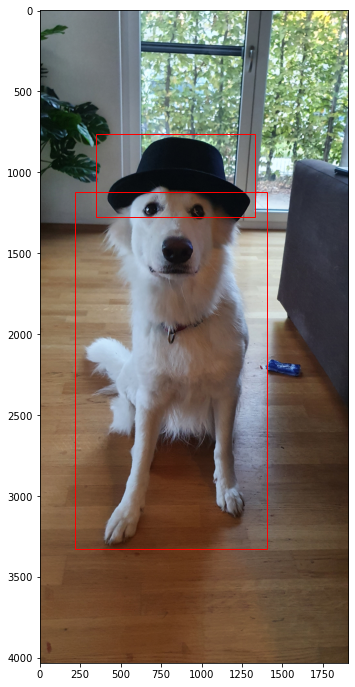

In [10]:
for path, image in images.items():

    example_image = Path(path)

    image_annos = annos[annos["image"]==image.id]
    
    f = plt.figure(figsize=(6,12))
    ax = f.subplots(1)
    img = mpimg.imread(example_image)
    
    ax.imshow(img)
    
    for vector in image_annos["vector"]:
        
        rect = patches.Rectangle((vector["x1"], vector["y1"]),vector["x2"]-vector["x1"], vector["y2"]-vector["y1"],
                                 linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
   
    plt.show()

# Upload

In [11]:
vector = {"x1":1479,"y1":460,"x2":2773,"y2":1461}

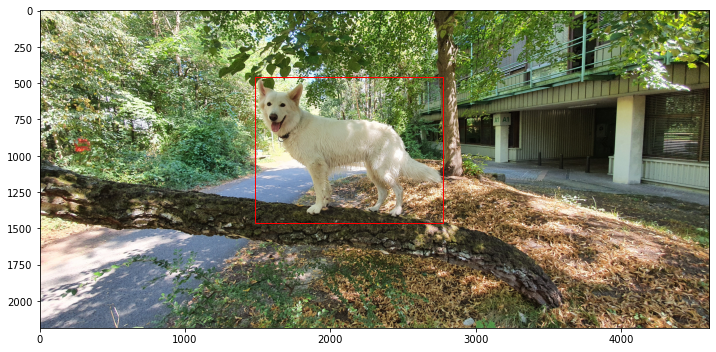

In [12]:
new_image = target_folder / "20200807_114826.jpg"


f = plt.figure(figsize=(12,6))
ax = f.subplots(1)
img = mpimg.imread(new_image)
    
ax.imshow(img)

rect = patches.Rectangle((vector["x1"], vector["y1"]),vector["x2"]-vector["x1"], vector["y2"]-vector["y1"],
                                 linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

In [13]:
help(images_api.create_image)

Help on method create_image in module exact_sync.v1.api.images_api:

create_image(**kwargs) method of exact_sync.v1.api.images_api.ImagesApi instance
    create_image  # noqa: E501
    
    This method makes a synchronous HTTP request by default. To make an
    asynchronous HTTP request, please pass async_req=True
    >>> thread = api.create_image(async_req=True)
    >>> result = thread.get()
    
    :param async_req bool
    :param str file_path:
    :param int image_type:
    :param int image_set:
    :return: Image
             If the method is called asynchronously,
             returns the request thread.



In [14]:
uploaded_image = images_api.create_image(file_path=new_image, image_set=image_set.id)
uploaded_image

{'count': 1,
 'next': None,
 'previous': None,
 'results': [{'annotations': [],
              'filename': '20200807_114826.tiff',
              'height': 2184,
              'id': 1523,
              'image_set': 182,
              'image_type': 0,
              'mpp': 0.0,
              'name': '20200807_114826.jpg',
              'objective_power': 1.0,
              'time': datetime.datetime(2020, 11, 1, 12, 49, 35, 400021),
              'width': 4608}]}

[Image](http://127.0.0.1:8000/annotations/1523)

In [15]:
dog = Annotation(annotation_type=313, vector=vector, image=1523)

annotations_api.create_annotation(body=dog)

{'annotation_type': 313,
 'annotationversion_set': [],
 'blurred': 'False',
 'concealed': 'False',
 'deleted': False,
 'description': '',
 'id': 1310632,
 'image': 1523,
 'last_edit_time': datetime.datetime(2020, 11, 1, 12, 50, 5, 987599),
 'last_editor': 4,
 'meta_data': None,
 'time': datetime.datetime(2020, 11, 1, 12, 50, 5, 987599),
 'unique_identifier': 'c94e8750-2b6a-466c-8ef6-daf2fd36cd02',
 'uploaded_media_files': [],
 'user': 4,
 'vector': {'x1': 1479, 'x2': 2773, 'y1': 460, 'y2': 1461},
 'verified_by_user': 'False'}